In [256]:


#for i in rset:
        
      #  Pset2z = N*np.array(Pset2)
       # print ("P(r,λ) for r value of", i, "is",Pset2z[i])
#plt.plot(rset,Pset2z)
#plt.title("Distribution of Probability for Each R Count")
#plt.xlabel("r ")
#plt.ylabel("P(r,λ)")

In [257]:
import statistics 
import numpy
import math
import numpy as np
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad 
from scipy.stats import chisquare
from decimal import Decimal

# 0.1m no shield
DataSet1 = [1,2,3,0,4,2,1,5,5,3,2,4,3,4,5,5,1,2,2,3,1,2,1,5,2,4,1,3,3,3,3,3,2,3,3,1,1
          ,1,2,3,1,7,2,3,3,2,2,1,2,2,2,3,1,1,0,3,3,0,3,7,3,4,2,2,3,4,6,2,3,4,3,1,6
          ,2,2,2,2,2,3,3,7,5,3,7,4,0,3,1,4,3,4,4,3,2,1,1,4,3,2,1,1,2
          ,3,2,2,1,1,2,1,7,2,3,3,3,1,2,1,3,2,5,2,1,4,5,1,1,1,1,4,1,1,2,2,2,5
          ,2,2,2,1,2,0,5,3,3,5,1,4,3,2,0,3,1,4,2,3,3,3,5,2,2,7,4,1,3,3,2,2
          ,3,2,2,0,2,0,5,2,3,4,2,3,3,2,2,3,2,4,3,8,3,2,2,0,2,3,4,3,6,1,1,2,6,4
          ,2,2,1,6,3,2,1,0,2,1,2,2,1,3,2,1,3,2,3,3,2,3,3,1,2,1,4,1,1,0,2,1,2,3,3,3,3,5,1,1,5,1,1,2,4,1,2,4,9]
# 1m
DataSet2 = [31,28,34,25,38,37,37,31,38,30,22,36,25,28,33,35,26,24,34,33,26,27,21,25,29
           ,23,22,36,19,27,35,37,20,20,34,20,31,30,21,27,29,28,30,35,33,25,15,31,24,33
           ,19,28,30,24,25,35,27,25,33,38,16,20,25,21,34,26,25,26,25,21,20,25,34,28,26
           ,26,34,20,25,26,24,29,19,27,34,24,21,32,28,25,29,30,28,30,24,18,28,23,30,20]
           
# 10m
DataSet3 = [285,298,260,273,285,262,276,281,286,290,273,303,257,267,275,295,302,246,300,301]
# 0.1m w/ Shield
DataSet4 = [2,0,1,0,2,2,4,1,3,0,2,0,2,2,2,1,1,1,2,0,1,1,1,2,2
           ,0,2,2,2,3,2,3,2,2,2,4,2,3,1,2,4,1,2,2,1,4,2,1,1,4
           ,2,1,1,0,4,1,1,3,3,3,1,0,1,1,1,1,3,2,3,2,1,1,2,3,2
           ,3,2,1,5,0,3,2,1,2,2,2,3,6,2,3,1,2,2,2,2,2,2,1,0,3
           ,3,2,1,3,0,2,1,0,1,1,0,2,0,2,2,2,3,1,1,2,0,0,5,1,1
           ,2,1,3,2,1,3,1,2,2,2,4,0,2,0,1,0,1,3,1,1,2,2,1,1,3
           ,3,0,3,1,1,2,3,1,3,0,2,0,2,0,1,1,1,5,1,3,2,0,0,3,1
           ,1,3,0,1,2,3,2,1,3,1,0,3,2,2,1,3,1,0,1,3,2,3,0,1,1
           ,4,2,2,2,1,2,1,2,3,1,0,1,1,3,1,2,0,1,2,2,0,1,0,1,1
           ,3,2,1,1,1,3,3,2,0,1,2,3,1,3,2,2,1,1,1,1,1,1,2,4,0]
                                                                                                        


DataSet1.sort()
DataSet2.sort()
DataSet3.sort()
DataSet4.sort()

In [258]:
def SampleSize(Set):
    N = len(Set)
    return N
    

In [259]:
# function to calculate factorial
def Factorial(N):
    
    factorial = 1
    if int(N) >= 0:
        for i in range (1,int(N)+1):
                factorial = factorial * i
        return factorial

In [260]:
# function to plot histogram
def Histogram(Set,Stat):
    
    mean,STD,variance,uncertainty=Stat
    N = SampleSize(Set)
    
    num_bins = N
    N, bins, patches = plt.hist(Set, num_bins, facecolor='blue',edgecolor='black',linewidth='1.2', alpha=0.5)
    plt.title("Rate of occurence of counterate")
    plt.xlabel("count")
    plt.ylabel("Frequency of Occurence")
    plt.subplots_adjust(left=0.15)
    plt.show()
    



In [261]:
def Stat(Set):
    N = SampleSize(Set)
    mean = (statistics.mean(Set))
    STD = (statistics.stdev(Set,xbar=None))
    variance = (statistics.variance(Set))
    Uncertainty = (STD/(math.sqrt(N)))
    
    return mean,STD,variance,Uncertainty

In [262]:
# function to model the occurence of counts of particles hitting the detector
def Poisson(Stat,Factorial,Set,SampleSize,Count):
    Pset=[]
    Eset=[]
    Probability=[]
    Cset = Count

    mean,STD,variance,uncertainty=Stat
    N=SampleSize
    
    for i in Set:
        if(i>100):
            P = (((np.exp(i-mean))*((mean/i)**i))/ (math.sqrt(2*np.pi*i)))*N
            #print ("P for r value of", i, "is", P)
            Pset.append(P)
            
        else:
            P = (((mean**i)*(math.exp(-mean)/(Factorial(i)))))*N
            #print ("P for r value of", i, "is", P)
            Pset.append(P)

    Pstd = statistics.stdev(Pset)
    PUncertain = (Pstd/(math.sqrt(N)))
    
    for i in Cset:
        prob = (i/N)
        Probability=np.append(Probability,prob)
    for i in Probability:
        Estat = np.sqrt(N*i*(1-i))
        Eset=np.append(Eset,Estat)
  
    
        
    
    
    a,b,c,d,e = Set,Pset,Cset,Probability,Eset
    #PErrorBar = ((Pstd + PUncertain) + (Pstd-PUncertain))/2
    #xerr,yerr = statistics.stdev(Set),PErrorBar
    plt.errorbar(a, b, e, xerr=None, fmt='', ecolor='g', elinewidth=0.5, capsize=None, barsabove=False, lolims=0, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None)
    plt.plot(Set,Pset)
    plt.plot(Set,Cset)
    
    #plt.plot(Set,Cset,'x')
    plt.xlabel("r ")
    plt.ylabel("Frequency of r occuring")
    


In [263]:
def Count(Set):
    count=[]
    
    for i in Set:
        Z=Set.count(i)
        #print("Count R of ", i, "is", Z)
        count.append(Z)
    return count


In [264]:
#Keep
def Variance(DataSet):
    N = len(DataSet)
    VarSum = 0
    x = 1/(N-1)
    for i in DataSet:
        VarSum = VarSum + (i - statistics.mean(DataSet))**2
    
    return x*VarSum

In [265]:
# Keep
def ErrorMean(DataSet):
    N = len(DataSet)
    VarSum = 0
    x = 1/(N-1)
    for i in DataSet:
        VarSum = VarSum + (i - statistics.mean(DataSet))**2
    
    Ssquare = x*VarSum
    EM = np.sqrt(Ssquare)/np.sqrt(N)
    
    return EM
    

In [266]:
# KEEP 
def ErrorVar(DataSet):
    N = len(DataSet)
    VarSum = 0
    x = 1/(N-1)
    for i in DataSet:
        VarSum = VarSum + (i - statistics.mean(DataSet))**2
    
    Ssquare = x*VarSum
    S = np.sqrt(Ssquare)/np.sqrt(N)
    
    
    EV = Ssquare*np.sqrt(2)/(np.sqrt(N-1))
    
    return EV

In [267]:
# KEEP
def Error(DataSet):
    N = len(DataSet)
    #Sample Standard Deviation
    Std = statistics.stdev(DataSet)  
    #Chi Square 
    #ChiSquare = 0 
    #for i in DataSet:
        #ChiSquare = ChiSquare + np.square((i-statistics.mean(DataSet)/Svar))
        #print (ChiSquare, i)
    print("Total Number of Counts: ", N)
    print("Mean: ", statistics.mean(DataSet))
    print("Standard Deviation: ", Std)
    print("Variance: ", Variance(DataSet))
    print("Uncertainty of the Mean: ",ErrorMean(DataSet))
    print("Uncertainty of the Variance: ",ErrorVar(DataSet))
    #print("Chi Square Distribution Value: ",ChiSquare)

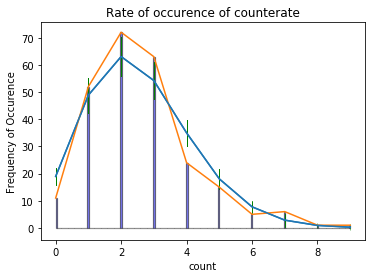

Total Number of Counts:  250
Mean:  2.58
Standard Deviation:  1.5791055370648142
Variance:  2.493574297188752
Uncertainty of the Mean:  0.099871403258165
Uncertainty of the Variance:  0.2234794722179518


In [268]:
# Data Set 1 : t = 1m, N = 120, V = 800

SampleSize(DataSet1)
Stat(DataSet1)
Poisson(Stat(DataSet1),Factorial,DataSet1,SampleSize(DataSet1),Count(DataSet1))
Histogram(DataSet1,Stat(DataSet1))
Error(DataSet1)



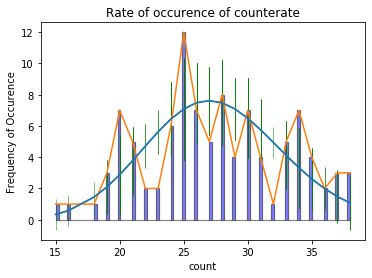

Total Number of Counts:  100
Mean:  27.48
Standard Deviation:  5.513033226231759
Variance:  30.393535353535356
Uncertainty of the Mean:  0.5513033226231758
Uncertainty of the Variance:  4.3199490066355395


In [269]:
# Data Set 2 : t = 1m, N = 100, V = 840

SampleSize(DataSet2)
Stat(DataSet2)
Poisson(Stat(DataSet2),Factorial,DataSet2,SampleSize(DataSet2),Count(DataSet2))
Histogram(DataSet2,Stat(DataSet2))
Error(DataSet2)


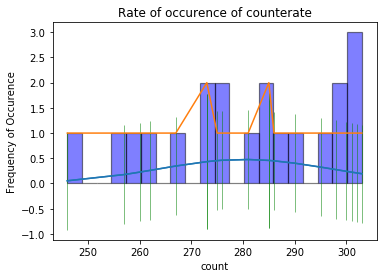

Total Number of Counts:  20
Mean:  280.75
Standard Deviation:  16.695019742741437
Variance:  278.7236842105263
Uncertainty of the Mean:  3.7331199030470903
Uncertainty of the Variance:  90.42990431086692


In [270]:
# Data Set 3 : t = 10.0m, N = 20, V = 840



SampleSize(DataSet3)
Stat(DataSet3)
Poisson(Stat(DataSet3),Factorial,DataSet3,SampleSize(DataSet3),Count(DataSet3))
Histogram(DataSet3,Stat(DataSet3))
Error(DataSet3)


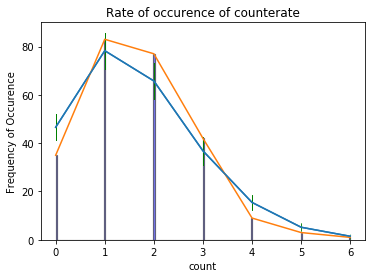

Total Number of Counts:  250
Mean:  1.68
Standard Deviation:  1.1308027500133484
Variance:  1.2787148594377487
Uncertainty of the Mean:  0.07151824548848354
Uncertainty of the Variance:  0.11460116597551266


In [271]:
# Data Set 4 : t = 0.1m, N = 250, V = 840



SampleSize(DataSet4)
Stat(DataSet4)
Poisson(Stat(DataSet4),Factorial,DataSet4,SampleSize(DataSet4),Count(DataSet4))
Histogram(DataSet4,Stat(DataSet4))
Error(DataSet4)


In [272]:
def ChiSquare(Stat,Factorial,Set,SampleSize,Count):
    Pset=[]
    Eset=[]
    Probability=[]
    Cset = Count

    mean,STD,variance,uncertainty=Stat
    N=SampleSize
    
    for i in Set:
        if(i>100):
            P = (((np.exp(i-mean))*((mean/i)**i))/ (math.sqrt(2*np.pi*i)))*N
            #print ("P for r value of", i, "is", P)
            Pset.append(P)
            
        else:
            P = (((mean**i)*(math.exp(-mean)/(Factorial(i)))))*N
            #print ("P for r value of", i, "is", P)
            Pset.append(P)

    Pstd = statistics.stdev(Pset)
    PUncertain = (Pstd/(math.sqrt(N)))
    
    for i in Cset:
        prob = (i/N)
        Probability=np.append(Probability,prob)
    for i in Probability:
        Estat = np.sqrt(N*i*(1-i))
        Eset=np.append(Eset,Estat)
    ChiSquare =[]
    ChiSum = 0
    for i in range(len(Set)):
        ChiStat = np.square((Set[i]- Pset[i]))/(Eset[i])
        ChiSquare=np.append(ChiSquare,ChiStat)
    print(ChiSquare)

In [273]:
ChiSquare(Stat(DataSet1),Factorial,DataSet1,SampleSize(DataSet1),Count(DataSet1))

[110.66115583 110.66115583 110.66115583 110.66115583 110.66115583
 110.66115583 110.66115583 110.66115583 110.66115583 110.66115583
 110.66115583 357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  520.51496723 520.51496723
 520.51496723 520.51496723 520.51496723 520.51496723 520.51496723
 520.51496723 520.51496723 520.51496723 520.51496723 520.51496723
 520.51496723 520.51

In [232]:
print(Variance(DataSet1))
print(Variance(DataSet2))
print(Variance(DataSet3))
print(Variance(DataSet4))

2.493574297188752
30.393535353535356
278.7236842105263
1.2787148594377487


In [253]:
ChiSquare(Stat(DataSet1),Factorial,DataSet1,SampleSize(DataSet1),Count(DataSet1))
ChiSquare(Stat(DataSet2),Factorial,DataSet2,SampleSize(DataSet2),Count(DataSet2))
ChiSquare(Stat(DataSet3),Factorial,DataSet3,SampleSize(DataSet3),Count(DataSet3))
ChiSquare(Stat(DataSet4),Factorial,DataSet4,SampleSize(DataSet4),Count(DataSet4))

[110.66115583 110.66115583 110.66115583 110.66115583 110.66115583
 110.66115583 110.66115583 110.66115583 110.66115583 110.66115583
 110.66115583 357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  357.1407352  357.1407352
 357.1407352  357.1407352  357.1407352  520.51496723 520.51496723
 520.51496723 520.51496723 520.51496723 520.51496723 520.51496723
 520.51496723 520.51496723 520.51496723 520.51496723 520.51496723
 520.51496723 520.51